### Explanation
Here is the rutine perform colony strain diferentiation by color


In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#we use scikit-image to analyse the images
import skimage 
from skimage import io, filters

In [4]:
fname1 =  "D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_G_7_3_17\image_%04d.jpg"
print(fname1%(0))   # just to see
fname2 = "D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_O_10_3_17\image_%04d.jpg"

fname3 = "D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_R_13_3_17\image_%04d.jpg"

fname4 = "D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_RGO_17_3_17\image_%04d.jpg"

Lets see what frame 500 looks like. We use PyPlot to read the file into a numpy array. This is a 3-dimensional array (a grid of values) with dimensions x,y,c, with (x,y) position and c the color channel (red, green, blue). 

<img src="files/imagearray.png" width=256 height=256>

We can use PyPlot again to display the array, which interprets the array as a color image correctly.

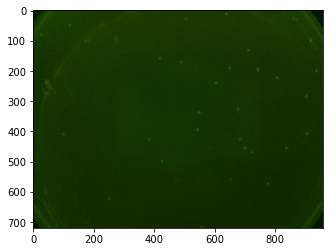

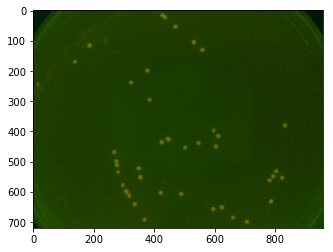

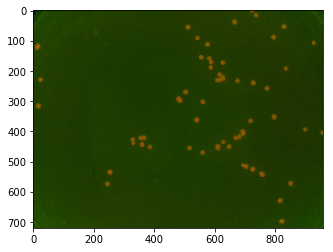

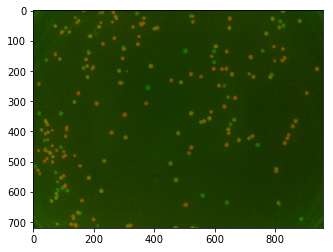

In [10]:
plt.figure()
im1 = plt.imread(fname1%100)
plt.imshow(im1)
plt.figure()
im2 = plt.imread(fname2%100)
plt.imshow(im2)
plt.figure()
im3 = plt.imread(fname3%100)
plt.imshow(im3)
plt.figure()
im4 = plt.imread(fname4%100)
plt.imshow(im4)

First get the size of the image from the numpy array shape, the 3rd dimension size is 3 for R,G,B. We dont need it so use the "_" variable.

In [12]:
w,h,_ = im1.shape
print(w,h)

720 960


### Loading the time series
There are 3 channels in each image. 
We will load each channel of all the images into a 3-dimensional array, with dimensions x, y, time. 

<img src="files/timeseriesarray.png" width=256 height=256>


As every image is a timepoint value, we should count the total number of images we have in the folder

In [13]:
import glob
def count_files(path,filetype):
    imageCount = len(glob.glob1(path,"*."+filetype))
    print(imageCount)
    return(imageCount)

In [16]:
#maibe this should be inside "get_im_data"
imCount1=count_files('D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_G_7_3_17',"jpg")
imCount2=count_files('D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_O_10_3_17',"jpg")
imCount3=count_files('D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_R_13_3_17',"jpg")
imCount4=count_files('D:\Dropbox\FTI\Raspiscope\Time lapse\TLE_RGO_17_3_17',"jpg")

388
210
206
210


Set the function to read images and save his values on the 3-dimensional array (for each channel)

In [22]:
def get_im_data(xframes,imageCount,fname): 
#xframes = step frames (e.g. 10 to use only ten to ten images)
#imageCount = total number of files
    nt = int(imageCount/xframes)
    imsR = np.zeros((w,h,nt))
    imsG = np.zeros((w,h,nt))
    imsB = np.zeros((w,h,nt))
    for i in range(0,nt):
        im = plt.imread(fname%(i*xframes))
        imsR[:,:,i] = im[:,:,0]              #last number code the channel: 0=red, 1=green, 2=blue
        imsG[:,:,i] = im[:,:,1]
        imsB[:,:,i] = im[:,:,2]
    return(imsR,imsG,imsB)
#to call you can take only the channels you are interested in (e.g.):
# red,_,blue=get_im_data(xframes,imageCount)  ---> this only takes the red and blue channels

In [52]:
DataS1={}
DataS1['R'],DataS1['G'],DataS1['B']=get_im_data(10,imCount1,fname1) 

In [63]:
DataS2={}
DataS2['R'],DataS2['G'],DataS2['B']=get_im_data(5,imCount2,fname2) 

In [64]:
DataS3={}
DataS3['R'],DataS3['G'],DataS3['B']=get_im_data(5,imCount3,fname3) 

In [65]:
DataS4={}
DataS4['R'],DataS4['G'],DataS4['B']=get_im_data(5,imCount4,fname4) 

### Background subtraction

First step is to identify a good background area and compute his value over time:

In [122]:
def BG_Val(X1,X2,Y1,Y2,data):
    #X1,X2,Y1,Y2 --> rectangle area limits: (X1,Y1)--> left-up corner. (X2,Y2) ---> rigth-bottom corner
    #data = the desired channel data to get the background
    
    X2R=X2-X1 #convert on steps because the rectangle patch definition
    Y2R=Y2-Y1
    
    #plot the defined area
    plt.figure(figsize=(8,8))
    fig = plt.gcf()
    ax = fig.gca()
    ax.imshow(data[:,:,-1], cmap='gray')
    rect = matplotlib.patches.Rectangle((Y1,X1),Y2R,X2R,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    
    #get the background time value and prot it
    plt.figure()
    bg = data[X1:X2,Y1:Y2,:].mean(axis=(0,1))
    plt.plot(bg)
    plt.xlabel('Time step')
    plt.ylabel('Fluorescence intensity')
    
    return(bg)

array([ 51.26915876,  53.62877925,  53.08208729,  53.1257432 ,
        52.88512334,  52.60642631,  52.49986085,  53.1200253 ,
        52.58805819,  52.96609741,  52.52392157,  52.3198988 ,
        51.73382669,  51.82393422,  51.42969007,  50.46445288,
        50.40441493,  50.15066414,  50.21535737,  49.88685642,
        50.14728653,  51.98660342,  51.41228336,  52.1427704 ,
        51.08966477,  51.03581278,  50.98672992,  50.58685642,
        50.59299178,  49.83253637,  49.65666034,  50.31641999,
        50.1398988 ,  50.64293485,  50.91636939,  51.90469323,
        52.25908918,  52.13623023])

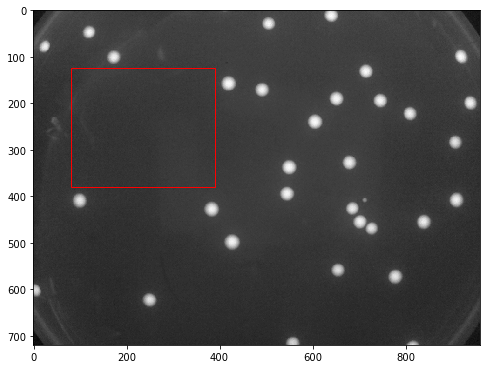

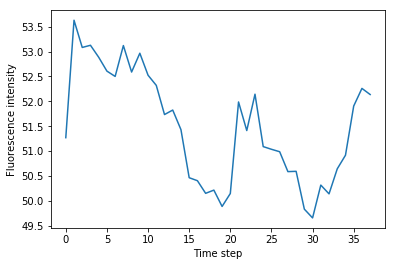

In [125]:
BG_Val(125,380,80,390,DataS1['G'])

## Get colony position

To identify colony position it's good to identify the channel with the biggest signal to improve the accuracy of the identification.

In [45]:
def max_chan(chan1,chan2,chan3):
    chans=np.zeros(3)
    chans[0]=chan1.sum()
    chans[1]=chan2.sum()
    chans[2]=chan3.sum()
    maxChan=chans.argmax()
    return(maxChan)

In [ ]:
max_chan(DataS1R,DataS1G,DataS1B)

In [57]:
def max_chan(Data):
    chans=np.zeros(3)
    chans[0]=Data['R'].sum()
    chans[1]=Data['G'].sum()
    chans[2]=Data['B'].sum()
    maxChan=chans.argmax()
    if maxChan == 0:
        return('R')
    elif maxChan == 1:
        return('G')
    elif maxChan == 2:
        return('B')

In [66]:
Mc1 = max_chan(DataS1) #Mc1 =maximum channel 1
Mc2 = max_chan(DataS2)
Mc3 = max_chan(DataS3)
Mc4 = max_chan(DataS4)
print('maximum channels are: '+ Mc1 +', '+Mc2 +', '+Mc3 +', '+Mc4 +', '+ 'respectively')

maximum channels are: G, G, G, G, respectively


This strategy doesn't work.... (try different channels in the plot below and you will see --> it always retrives the green channel because background if biggest on them).
It's better to set it by eye

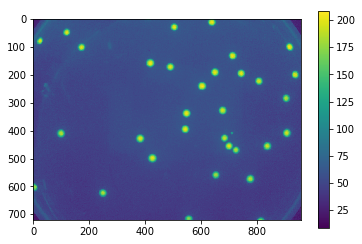

In [131]:
plt.imshow(DataS1['G'][:,:,-1])
plt.colorbar()

Based on above plot, we can fix the max value channels:
(and, as we expect, it is never the blue channel)

In [132]:
Mc1='G'
Mc2='R'
Mc3='R'
Mc4='R'

## General color analysis
As a first aproach it's possible to analyse the relative level of green and red channel on the whole image

In [150]:
def Sum_2C_plot(data,Channel1,Channel2,Fname):
    plt.figure()
    plt.plot(data[Channel1].sum(axis=(0,1)),data[Channel2].sum(axis=(0,1)))
    plt.title(Fname)
    plt.xlabel(Channel1+' Channel')
    plt.ylabel(Channel2+' Channel')

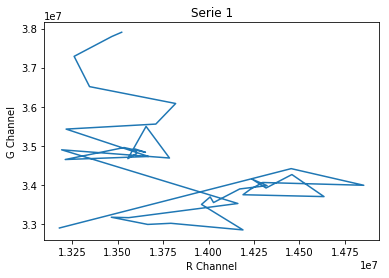

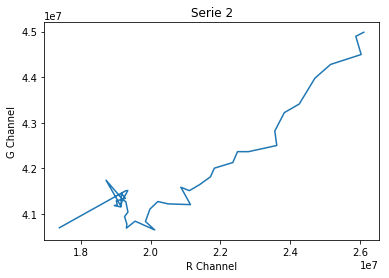

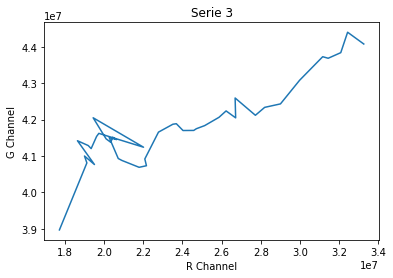

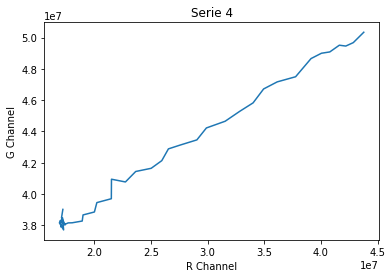

In [151]:
Chan1='R'
Chan2='G'
Sum_2C_plot(DataS1,Chan1,Chan2,'Serie 1')
Sum_2C_plot(DataS2,Chan1,Chan2,'Serie 2')
Sum_2C_plot(DataS3,Chan1,Chan2,'Serie 3')
Sum_2C_plot(DataS4,Chan1,Chan2,'Serie 4')